<a href="https://colab.research.google.com/github/thepankaj018/Google-Search-Analysis/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement:
### <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

### <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
#sns.set_style("whitegrid", {'axes.grid' : False})


In [ ]:
file_path = '/content/drive/MyDrive/Copy of Global Terrorism Data.csv'
df=pd.read_csv(file_path,encoding="ISO-8859-1")

In [ ]:
# Looking first five rows of dataframe
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
# Looking for shape of dataframe
print(f'number of rows are {df.shape[0]}')
print(f'number of columns are {df.shape[1]}')

number of rows are 181691
number of columns are 135


#Data Cleaning

In [ ]:
# Checking NULL values
null_count_df = df.isnull().sum().to_frame().rename(columns = {0:'NULL Values'})
null_count_df['NULL Values %'] = null_count_df['NULL Values']*100 / len(df)
null_count_df

,NULL Values,NULL Values %
eventid,0,0.000000
iyear,0,0.000000
imonth,0,0.000000
iday,0,0.000000
approxdate,172452,94.914993
extended,0,0.000000
resolution,179471,98.778145
country,0,0.000000
country_txt,0,0.000000
region,0,0.000000


In [ ]:
# Finding features having more than 70% NULL Values
percent_null70 = null_count_df[null_count_df['NULL Values %'] > 70].index.tolist()
percent_null70

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propvalue',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',
 

In [ ]:
# Droping those columns which have more than 70 percent null values
df.drop(columns = percent_null70,inplace = True)

In [ ]:
# Again checking percent null values 
(df.isnull().sum()*100/len(df)).to_frame().rename(columns = {0:'Percent_NULL'})

,Percent_NULL
eventid,0.000000
iyear,0.000000
imonth,0.000000
iday,0.000000
extended,0.000000
country,0.000000
country_txt,0.000000
region,0.000000
region_txt,0.000000
provstate,0.231712


In [ ]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


In [ ]:
# Looking number of unique values,unique values and percentage null value of the columns.
for elem in df.iloc[:,4:].columns.tolist():
  print("-"*100)
  print('')
  print(f'unique values in {elem} are')
  print(df[elem].unique())
  print('')
  print(f'number of unique values in {elem} are')
  print(df[elem].nunique())
  print('')
  print(f'NULL values in {elem} are')
  print(f'{df[elem].isnull().sum()*100/len(df)} Percent')



----------------------------------------------------------------------------------------------------

unique values in extended are
[0 1]

number of unique values in extended are
2

NULL values in extended are
0.0 Percent
----------------------------------------------------------------------------------------------------

unique values in country are
[  58  130  160   78  101  217  218   98  499   65   83  222  362  199
  102  185   30   60   11  110   96  209  158   94  603   45   26  145
  142   21   38   14  153  230  198   49  406   36   97  161  201  156
  106  155   15  236   92   69  428   31  604  605  162    6   61  205
   87  195  136   53  138    4  159   43   88  235   59  144  121  178
   29  100   42  377    7  200  184  215  183  104   95  182  203  186
  139   17  147   20  207   19    8  128  173   56   93  124  403  359
   55  349   86  137  208  213  151  111   72  113   18   89  174  231
   84   80  532   22   81  127  221    5   41  176   57  164   32  196
  197  1

In [ ]:

df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'ransom', 'scite1',
       'scite2', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
# Making a list of relevent and known columns.
columns_to_keep =['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','targsubtype1_txt',
                  'target1','natlty1_txt','gname','weaptype1_txt','nkill','nwound','ishostkid']

In [ ]:
# featching relevent columns from dataframe
df = df[columns_to_keep]

In [ ]:
# Renaming columns
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   'targsubtype1_txt':'Target Subtype','target1':'Target',
                   'natlty1_txt':'Nationality',"gname":"Group Name","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded"},inplace=True)

#Data Description:

##1.eventid:
A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).
###2.Year:
This field contains the year in which the incident occurred.
###3.Month
This field contains the number of the month in which the incident occurred.
###4.Day
This field contains the numeric day of the month on which the incident occurred.
###5.Country:
This field identifies the country or location where the incident occurred.
###6.Region:
This field identifies the region in which the incident occurred.
###7.Province/State:
Name (at the time of event) of the 1st order subnational administrative region.
###8.City:
Name of the city, village, or town in which the incident occurred.
###9.Attack Type:
The general method of attack and broad class of tactics used.
###10.Target Type:
The general type of target/victim
###11.Target Subtype:
The more specific target category.
###12.Target:
The specific person, building, installation that was targeted and/or victimized.
###13.Nationality:
The nationality of the target that was attacked.
###14.Group Name:
The name of the group that carried out the attack.
###Weapon Type:
General type of weapon used in the incident.
###15.Killed:
The number of total confirmed fatalities for the incident.
###Wounded:
The number of injuries reported
###16.ishostkid:
Whether the hostages is kid or not



In [ ]:
# Droping some more columns
df.drop(columns = ['eventid','Target Subtype','Target','Nationality','ishostkid'],inplace = True)

In [ ]:
df.sample(5)

,Year,Month,Day,Country,Region,Province/State,City,Attack Type,Target Type,Group Name,Weapon Type,Killed,Wounded
35805,1988,10,3,El Salvador,Central America & Caribbean,Ahuachapan,Atiquizaya,Armed Assault,Private Citizens & Property,Farabundo Marti National Liberation Front (FMLN),Firearms,0.0,0.0
145335,2015,3,7,Syria,Middle East & North Africa,Al Hasakah,Tall Tamr,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),Explosives,NaN,NaN
7907,1979,3,23,United Kingdom,Western Europe,Northern Ireland,Newry,Bombing/Explosion,Unknown,Irish Republican Army (IRA),Explosives,NaN,NaN
138501,2014,9,30,Egypt,Middle East & North Africa,Sohag,Dar al-Salam,Armed Assault,Police,Unknown,Firearms,1.0,1.0
57086,1994,8,20,Mozambique,Sub-Saharan Africa,Sofala,Inhaminga,Hostage Taking (Kidnapping),Government (General),Mozambique National Resistance Movement (MNR),Unknown,0.0,0.0


In [ ]:
#Checking null Values
null_df = df.isnull().sum().to_frame().rename(columns={0:"NULL Values"})
null_df

,NULL Values
Year,0
Month,0
Day,0
Country,0
Region,0
Province/State,421
City,434
Attack Type,0
Target Type,0
Group Name,0


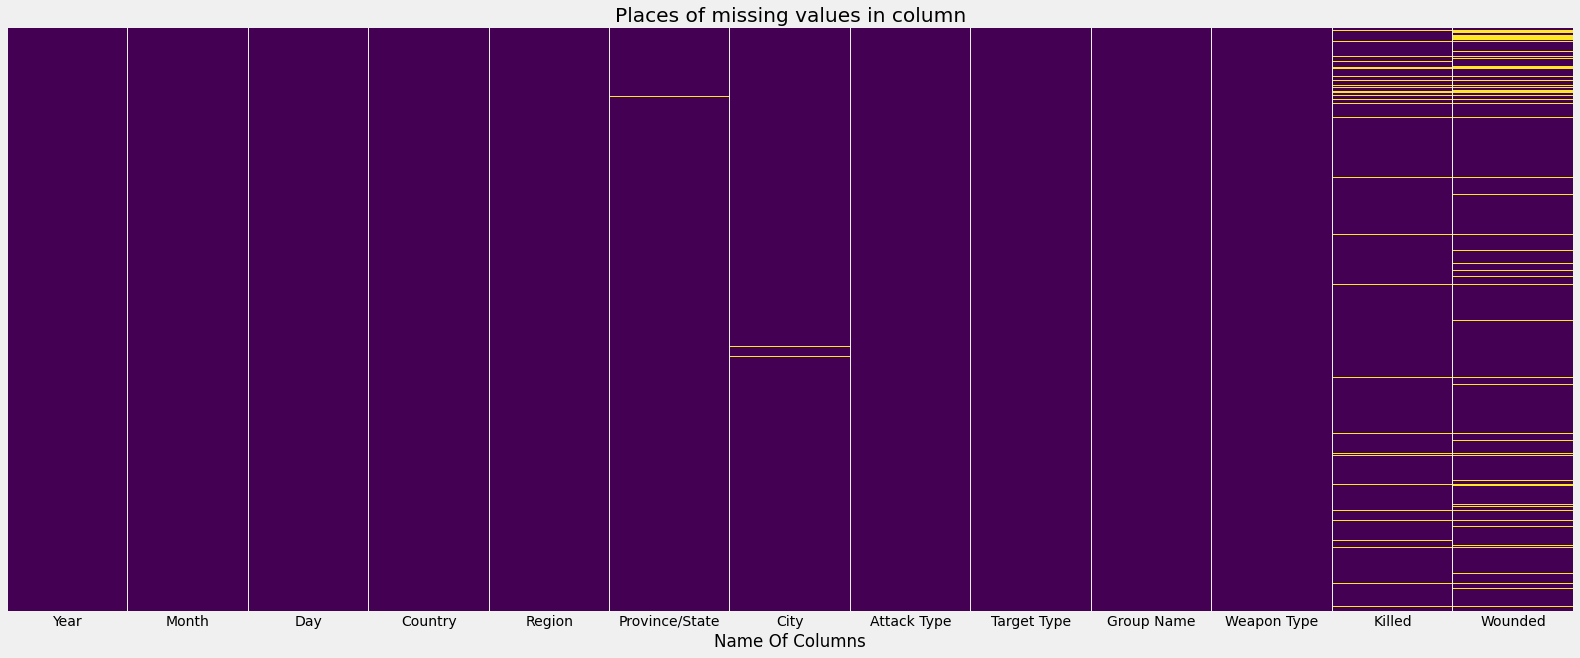

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column");

In [ ]:
# Replacing NULL Values with mode.
null_df_columns = null_df.loc[null_df['NULL Values'] > 0].index.tolist()
null_df_columns

['Province/State', 'City', 'Killed', 'Wounded']

In [ ]:
for elem in null_df_columns:
  mode = df[elem].mode()[0]
  df[elem] = df[elem].replace(np.NaN,mode)

In [ ]:
# Fetching Categorical features from dataframe
categorical = list(set(df.columns.tolist()) - set(df.describe().columns.tolist()))
categorical

['Group Name',
 'Attack Type',
 'Province/State',
 'Region',
 'Target Type',
 'Country',
 'City',
 'Weapon Type']

In [ ]:
for items in categorical:
  print('-'*100)
  print(f'Unique values in {items} are')
  print(df[items].unique())

----------------------------------------------------------------------------------------------------
Unique values in Group Name are
['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
----------------------------------------------------------------------------------------------------
Unique values in Attack Type are
['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
----------------------------------------------------------------------------------------------------
Unique values in Province/State are
['Baghdad' 'Federal' 'Tarlac' ... 'Carlow' 'Western Lakes' 'Vidzeme']
----------------------------------------------------------------------------------------------------
Unique values in Region are
['Central America & Caribbean' 'North America' 'Southea

In [ ]:
#Checking column which have "Unknown Values"
series = df.isin(['Unknown']).sum()
series

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State     4290
City              10209
Attack Type        7276
Target Type        5898
Group Name        82782
Weapon Type       15157
Killed                0
Wounded               0
dtype: int64

In [ ]:
unknown_list = []
for items in series.iteritems():
  if items[1] > 0:
    unknown_list.append(items[0])
unknown_list


['Province/State',
 'City',
 'Attack Type',
 'Target Type',
 'Group Name',
 'Weapon Type']

In [ ]:
# Replacing 'Unkown' values with mode of their respective column.
for elem in unknown_list:
  mode = df[elem].mode()[0]
  df[elem] = df[elem].replace('Unknown',mode)

In [ ]:
df.isin(['Unknown']).sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State        0
City              10209
Attack Type           0
Target Type           0
Group Name        82782
Weapon Type           0
Killed                0
Wounded               0
dtype: int64

In [ ]:
"""
  1.The mode of the column 'City' and 'Group Name' is itself "Unnown" means unknown appread most of the time in these columns.
  2.It might be possible that most of the terror organization had not take the responsibility of attack or the attack might be performed 
  3.by some anonymous terror group.
  4.For city i would say may be the attack done on the neural location like line of control of two countries or some disputed region.
  5.So keeping in mind of above conditions i am keeping these unknown values in these columns.

"""

'\n  1.The mode of the column \'City\' and \'Group Name\' is itself "Unnown" means unknown appread most of the time in these columns.\n  2.It might be possible that most of the terror organization had not take the responsibility of attack or the attack might be performed \n  3.by some anonymous terror group.\n  4.For city i would say may be the attack done on the neural location like line of control of two countries or some disputed region.\n  5.So keeping in mind of above conditions i am keeping these unknown values in these columns.\n\n'

#EDA (Exploratory Data Analysis)

# 1. Year wise Attacks

In [ ]:
year_wise_attack = df.groupby('Year').agg({'Year':'count'}).rename(columns = {'Year':'Count'}).reset_index()
year_wise_attack.head()

,Year,Count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


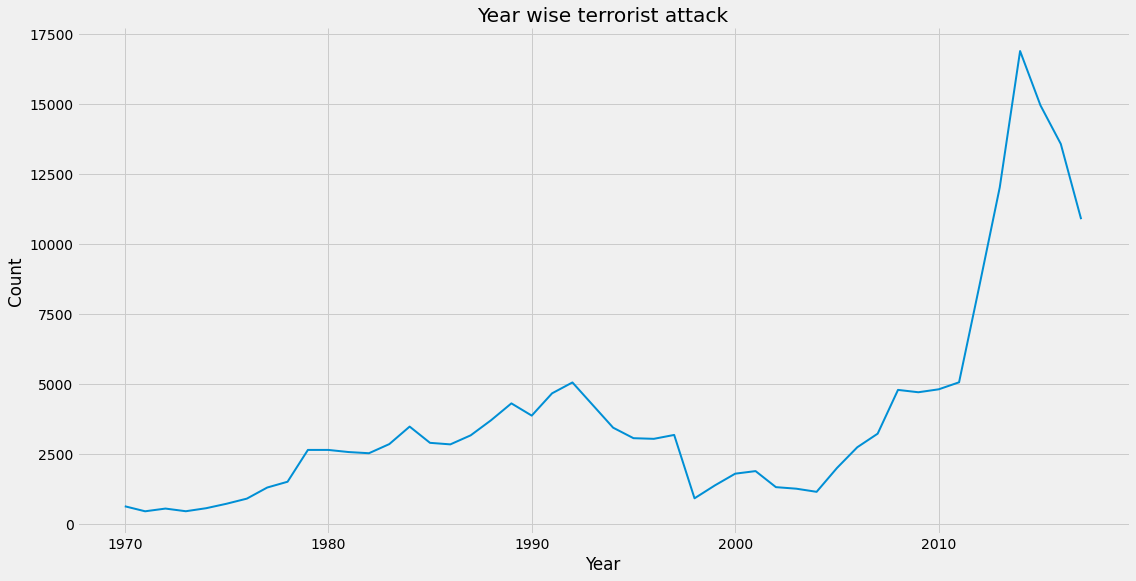

In [ ]:
sns.relplot(data = year_wise_attack,x = 'Year',y = 'Count',kind = 'line',height = 8,aspect = 2,palette = "husl",lw = 2)
plt.title('Year wise terrorist attack')
plt.show()


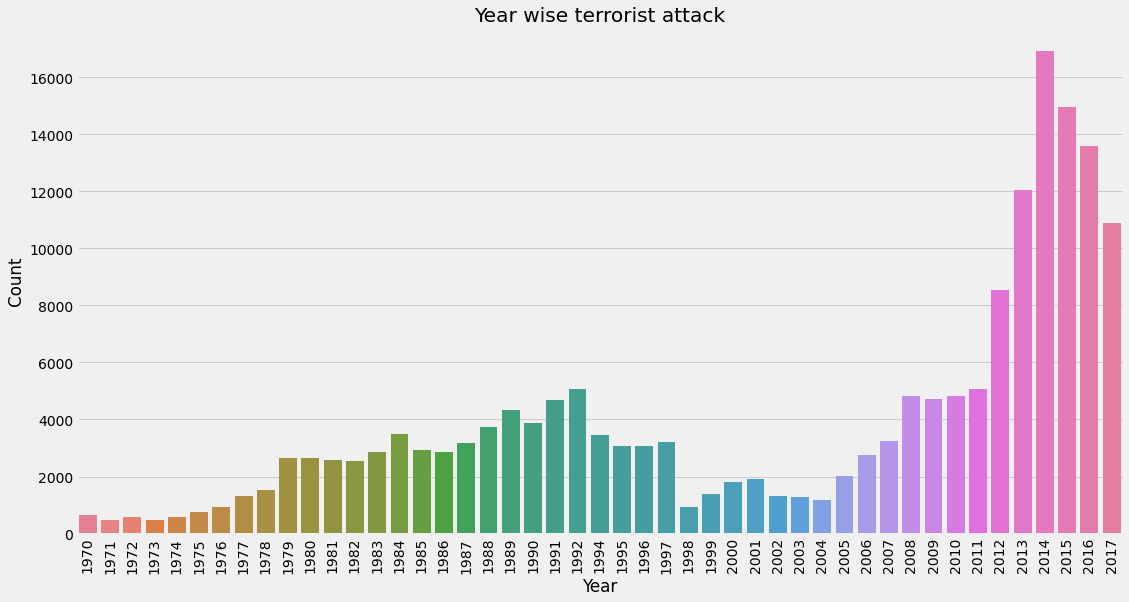

In [ ]:
sns.catplot(data = year_wise_attack,x = 'Year',y = 'Count',kind = 'bar',height = 8,aspect = 2,palette = "husl")
plt.title('Year wise terrorist attack')
plt.xticks(rotation = 90)
plt.show()

##Conclusion
(i). Most number of attacks(16903) in 2014<br>
(ii). Least number of attacks(471) in 1971<br>
(iii).Terrorist activity shows a significant increase during course of time.

# 1. Country wise Attacks

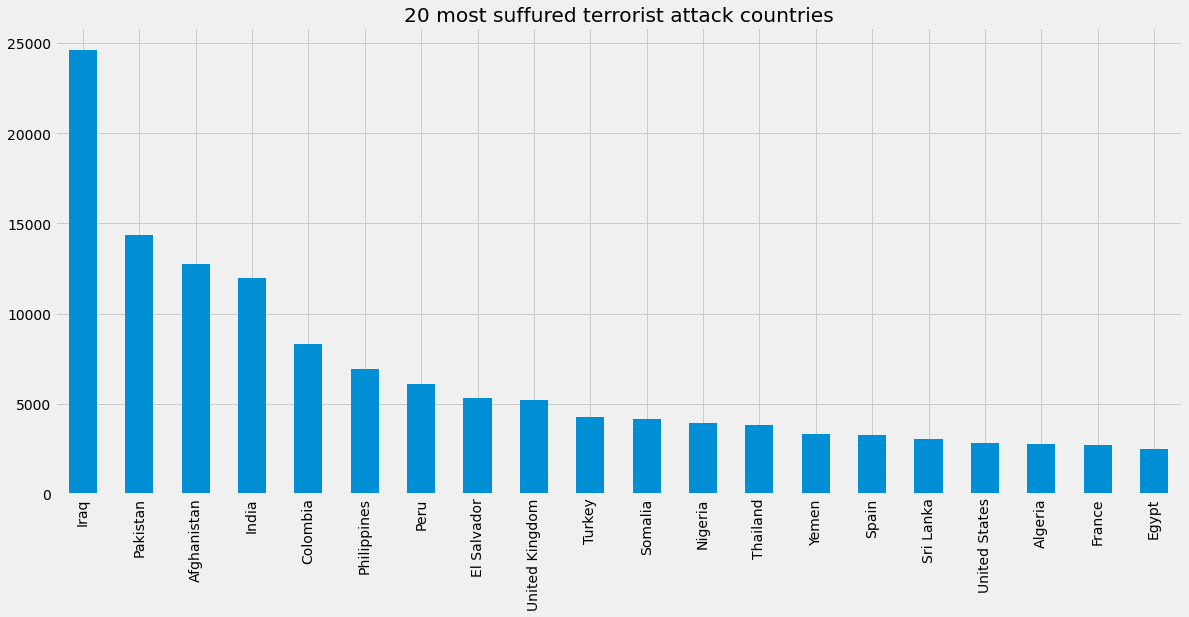

In [ ]:

plt.figure(figsize = (18,8))
df['Country'].value_counts()[:20].plot(kind = 'bar')
plt.title('20 most suffured terrorist attack countries')
plt.show()




##Conclusion:
###Iraq suffured most from terrorist attacks followes by Pakistan.
###India comes fourth in the global ranking of most terrorist attack.

# 1. Region wise Attacks

In [ ]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

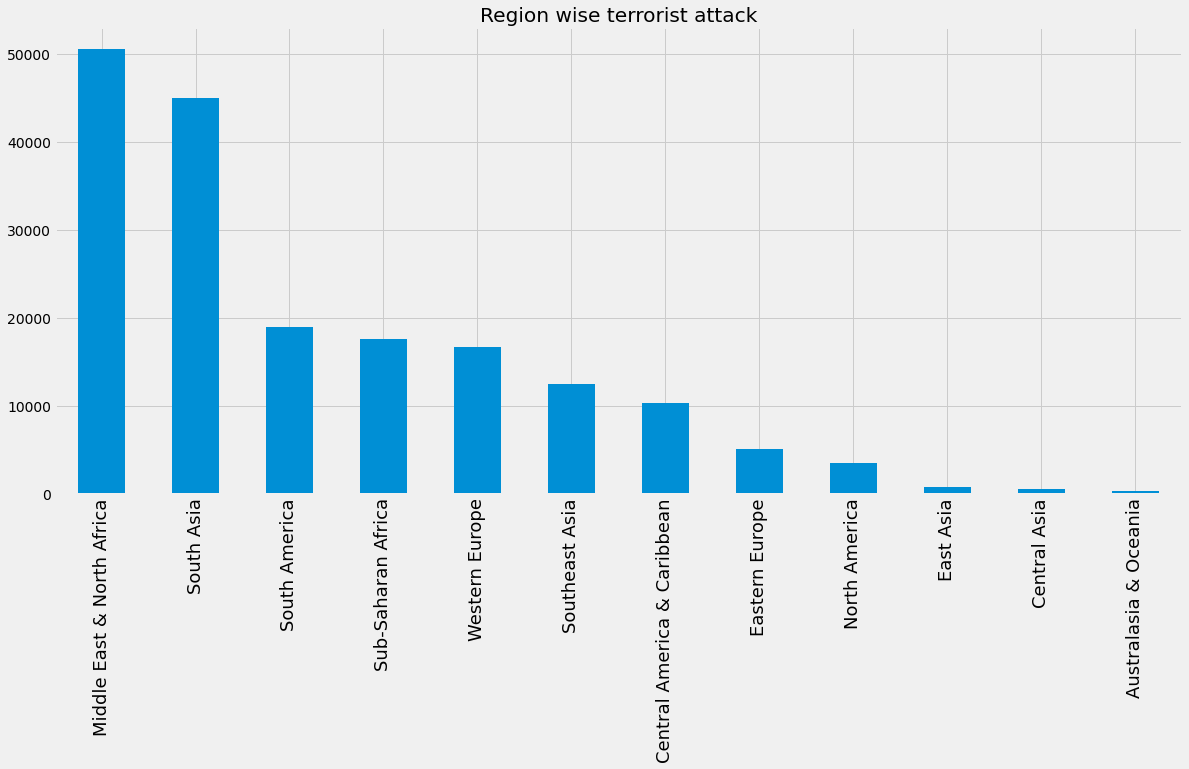

In [ ]:
plt.figure(figsize = (18,8))
df['Region'].value_counts().plot(kind = 'bar')
plt.title('Region wise terrorist attack')
plt.xticks(fontsize=18,rotation =90)
plt.show()


##Conclusion
####1.Middle East & North Africa are mostly affected followed by South Asia.
####2.Australia & Oceania is least affected

##State wise  Attacks

In [ ]:
df['Province/State'].value_counts().shape[0]

2854

In [ ]:
df['City'].value_counts().shape[0]

36674

In [ ]:
top_20_state = df.groupby(['Province/State','Country']).size().reset_index().rename(columns = {0:'Count'}).sort_values(by ='Count',ascending = False).iloc[:20,:]
top_20_state

,Province/State,Country,Count
289,Baghdad,Iraq,7792
2121,Northern Ireland,United Kingdom,4498
406,Balochistan,Pakistan,3710
2511,Saladin,Iraq,3411
58,Al Anbar,Iraq,3299
2043,Nineveh,Iraq,3241
2651,Sindh,Pakistan,3206
1492,Khyber Pakhtunkhwa,Pakistan,3084
901,Diyala,Iraq,3041
1663,Lima,Peru,2615


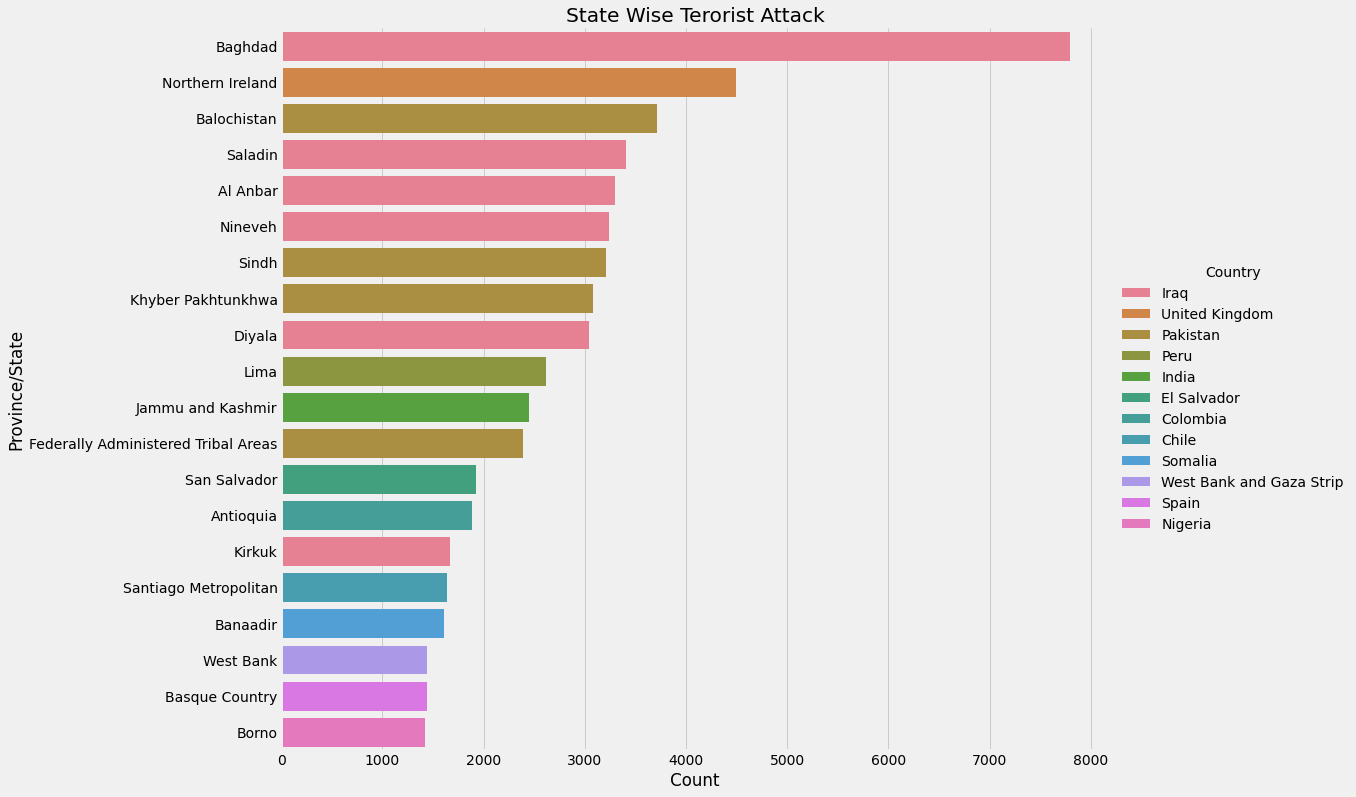

In [ ]:
sns.catplot(data = top_20_state,y = 'Province/State',x = 'Count',hue = 'Country',kind = 'bar',palette = "husl",height = 11,aspect = 1.5,dodge = False)
plt.title('State Wise Terorist Attack')
plt.show()

##Conclusion:
###1.Baghdad state of Iraq faces the most terrorist attacks followed by Northern Ireland of United Kingdom.
###2.Jammu and Kashmir of India comes at 11th position

##City wise Attacks

In [ ]:
df['City'].nunique()

36674

In [ ]:
city_df = df.groupby(['City','Province/State','Country']).size().reset_index().rename(columns= {0:'Counts'}).sort_values(by ='Counts',ascending = False).head(10)
city_df

,City,Province/State,Country,Counts
3294,Baghdad,Baghdad,Iraq,7585
17556,Karachi,Sindh,Pakistan,2650
21415,Lima,Lima,Peru,2359
25001,Mosul,Nineveh,Iraq,2264
4889,Belfast,Northern Ireland,United Kingdom,2170
32927,Santiago,Santiago Metropolitan,Chile,1611
24656,Mogadishu,Banaadir,Somalia,1581
32571,San Salvador,San Salvador,El Salvador,1557
15824,Istanbul,Istanbul,Turkey,1048
2718,Athens,Attica,Greece,1018


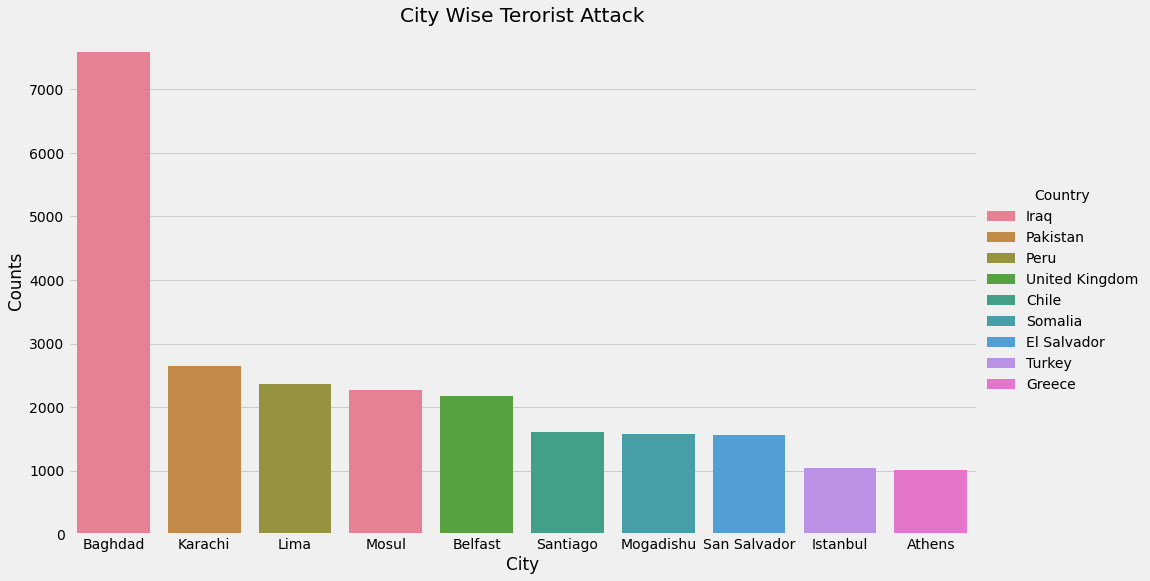

In [ ]:
sns.catplot(data = city_df,x = 'City',y = 'Counts',hue = 'Country',kind = 'bar',palette = "husl",height = 8,aspect = 1.75,dodge = False)
plt.title('City Wise Terorist Attack')
plt.show()

#Conclusions
###Baghdad city of Iraq had most terrorist attacks followed by Karachi of Pakistan
###None of the Indian city comes under top10

#Attack Type Analysis

In [ ]:
"""
 Creating a dataframe that have features like attack type ,country and counts where counts shows
 how many times particular country attacked by particular attack type
 """
attack_df = df.groupby(['Attack Type','Country']).size().reset_index().rename(columns = {0:'Counts'}).sort_values(by = 'Counts',ascending = False).reset_index().drop(columns = 'index')
attack_df.head(20)

,Attack Type,Country,Counts
0,Bombing/Explosion,Iraq,19051
1,Bombing/Explosion,Pakistan,7849
2,Bombing/Explosion,Afghanistan,7418
3,Bombing/Explosion,India,5137
4,Armed Assault,Pakistan,3859
5,Bombing/Explosion,Colombia,3522
6,Bombing/Explosion,Peru,3360
7,Armed Assault,India,3184
8,Armed Assault,Iraq,3155
9,Armed Assault,Afghanistan,2877


In [ ]:
"""
  creating a dataframe that shows which attack method is mostly used by terrorists for attack in a particular country
  whereas counts in that dataframe shows number of times that attack method was used. 
"""
attack_df['rnk'] = attack_df.groupby(['Attack Type'])['Counts'].rank(method = 'first',ascending = False)
attack_type_freq_country_df = attack_df[attack_df['rnk'] == 1.0][['Attack Type','Country','Counts']]
attack_type_freq_country_df


,Attack Type,Country,Counts
0,Bombing/Explosion,Iraq,19051
4,Armed Assault,Pakistan,3859
24,Assassination,United Kingdom,1651
41,Hostage Taking (Kidnapping),India,1184
52,Facility/Infrastructure Attack,India,996
163,Unarmed Assault,India,143
182,Hostage Taking (Barricade Incident),El Salvador,117
286,Hijacking,Sudan,45


In [ ]:
attack_type_freq_df = df['Attack Type'].value_counts().reset_index().rename(columns = {'index':'Attack Type','Attack Type':'frequency'})
attack_type_freq_df

,Attack Type,frequency
0,Bombing/Explosion,95531
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unarmed Assault,1015
6,Hostage Taking (Barricade Incident),991
7,Hijacking,659


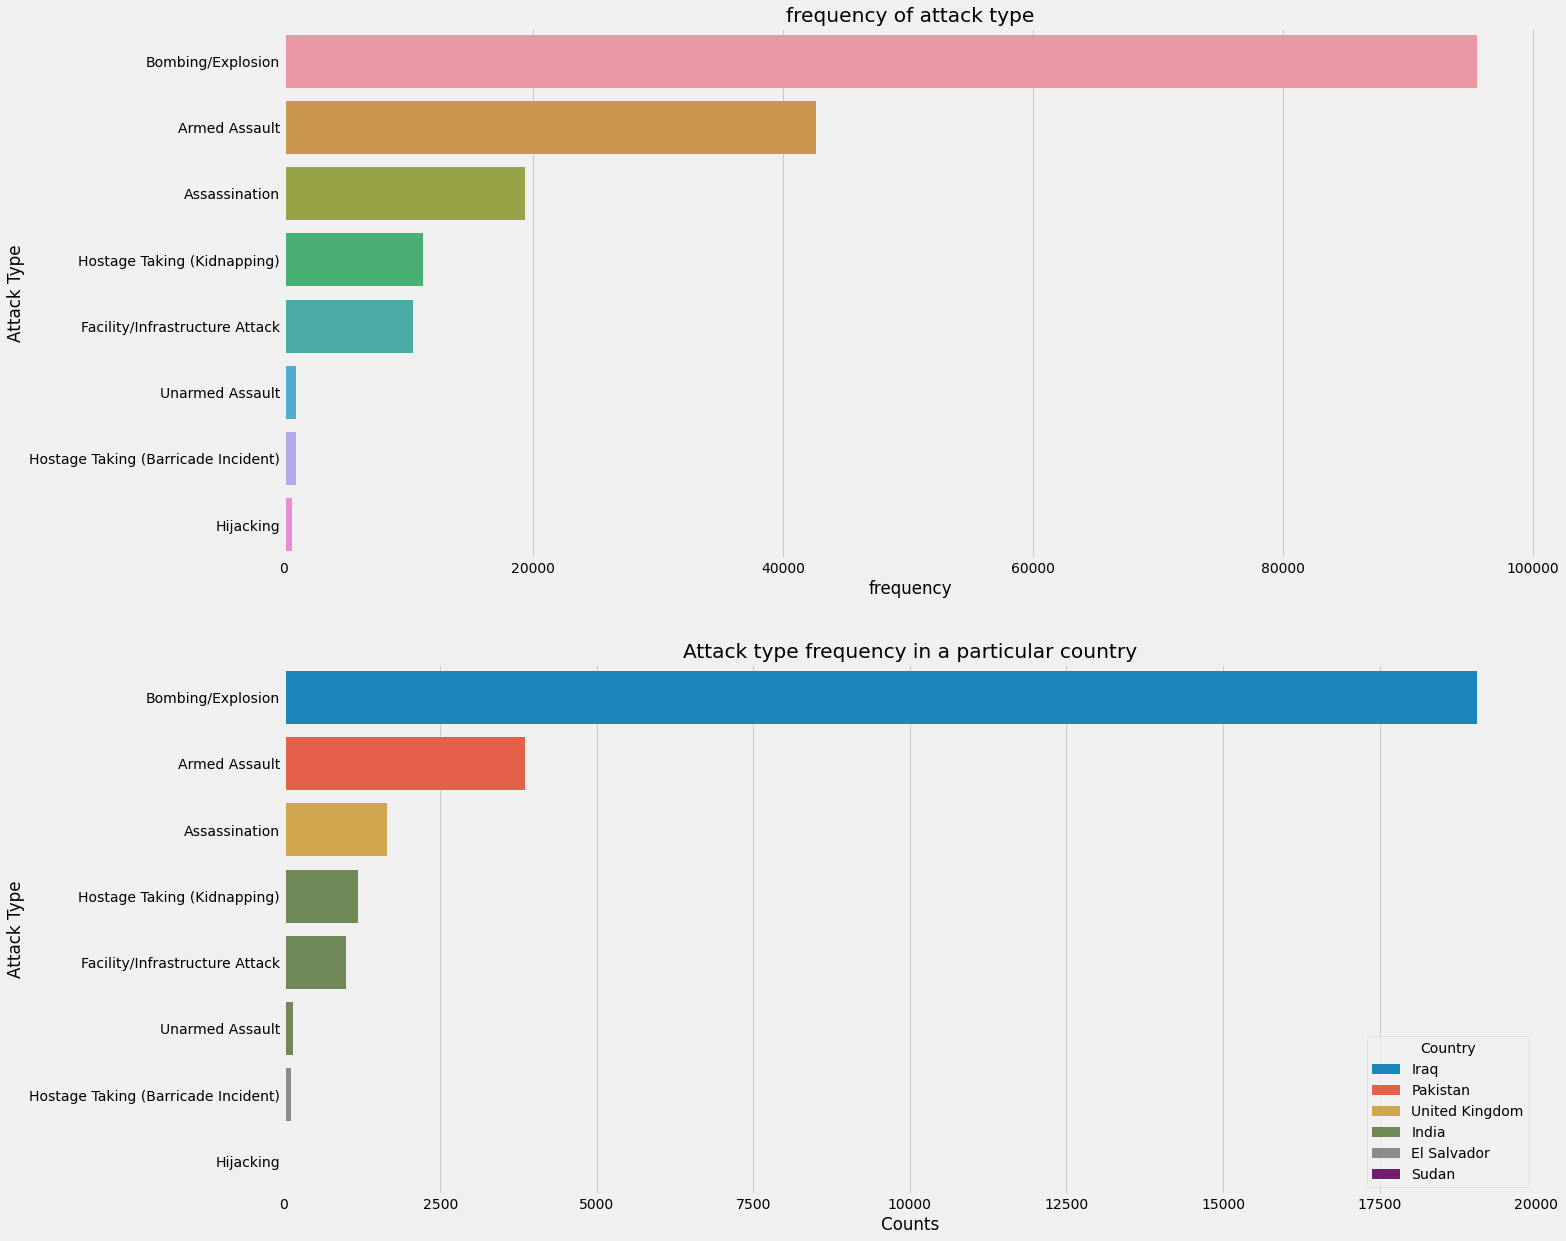

In [ ]:
# Visualization
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
sns.barplot(ax = axes[0],y = attack_type_freq_df['Attack Type'],x = attack_type_freq_df['frequency'])
axes[0].set_title('frequency of attack type')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)

sns.barplot(ax = axes[1],y = attack_type_freq_country_df['Attack Type'],x = attack_type_freq_country_df['Counts'],
            hue = attack_type_freq_country_df['Country'],dodge = False)
axes[1].set_title('Attack type frequency in a particular country')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
plt.show()

##Conclusion:
####1.Bombing/Explosion is favorite attack type by the terrorist next followed by Armed Assault.
####2.Hijacking is least preferred by terrorists
####3.In Iraq Bombing/Explosion type attack has happened most of the time whereas in Pakistan Armed Assault type attack happened the most.
####3.In India Hostage Taking (Kidnapping) type attack happend most of the time.

#Target Type Analysis

In [ ]:
target_type_df=df['Target Type'].value_counts().reset_index().rename(columns = {'index':'Target Type','Target Type':'Counts'})
target_type_df

,Target Type,Counts
0,Private Citizens & Property,49409
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Religious Figures/Institutions,4440
8,Educational Institution,4322
9,Government (Diplomatic),3573


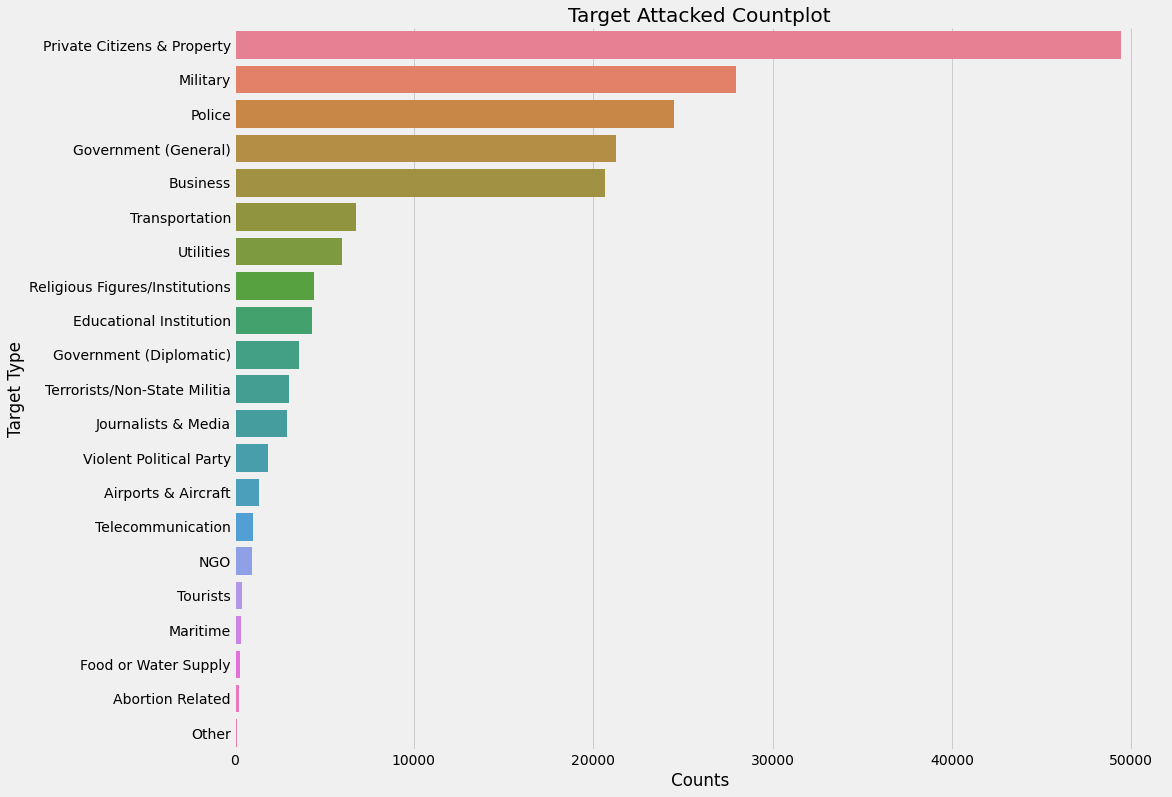

In [ ]:
sns.catplot(data = target_type_df,y = 'Target Type', x = 'Counts',kind = 'bar',height = 11,aspect = 1.5,palette = "husl")
plt.title('Target Attacked Countplot')
plt.show()

##Conclusion:
####Private Citizens & Property is the category which is targeted by the terrorist most followed by Military and Police

In [ ]:
year_wise_tgt_type = df.groupby(['Year','Target Type']).size().reset_index().rename(columns = {0:'Count'}).sort_values(by = ['Year','Count'],ascending = [True,False])
year_wise_tgt_type

,Year,Target Type,Count
1,1970,Business,136
7,1970,Military,86
10,1970,Police,81
5,1970,Government (General),80
2,1970,Educational Institution,62
11,1970,Private Citizens & Property,61
4,1970,Government (Diplomatic),55
0,1970,Airports & Aircraft,25
17,1970,Utilities,16
12,1970,Religious Figures/Institutions,13


In [ ]:
year_wise_tgt_type['rnk']= year_wise_tgt_type.groupby('Year')['Count'].rank(method = 'first',ascending = False)
year_wise_top_tgt = year_wise_tgt_type[year_wise_tgt_type['rnk'] == 1.0][['Year','Target Type','Count']]
year_wise_top_tgt

,Year,Target Type,Count
1,1970,Business,136
20,1971,Business,131
47,1972,Private Citizens & Property,152
64,1973,Private Citizens & Property,127
70,1974,Business,179
86,1975,Business,204
106,1976,Business,216
125,1977,Business,409
145,1978,Business,422
166,1979,Business,598


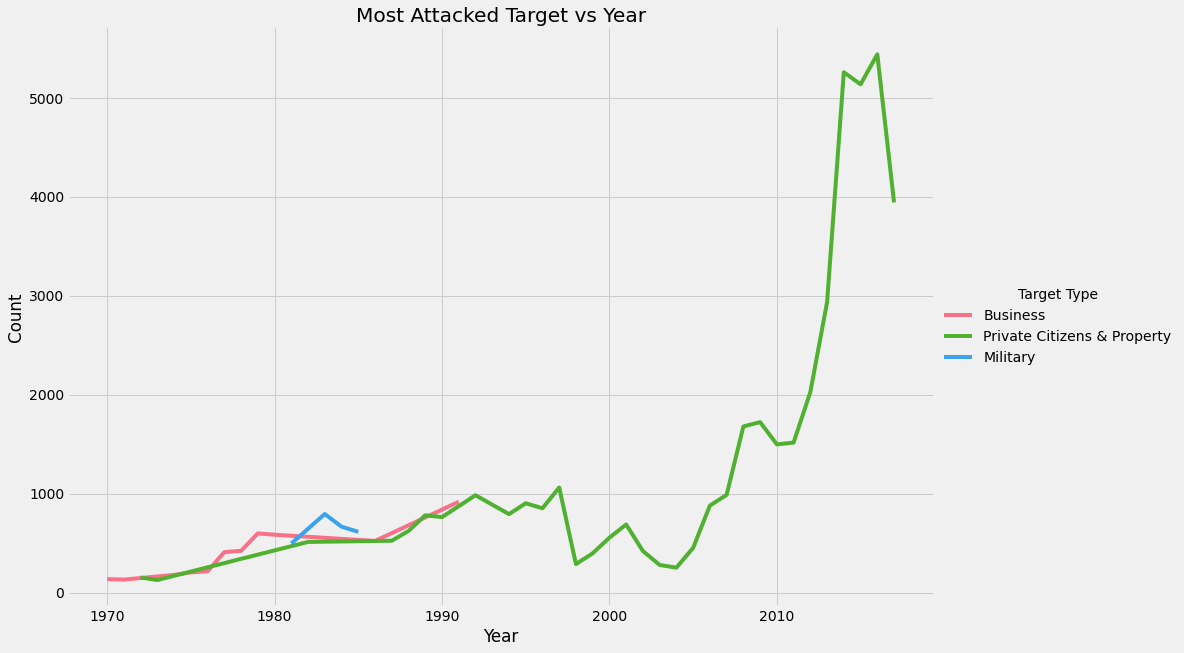

In [ ]:
sns.relplot(data = year_wise_top_tgt,y = 'Count', x = 'Year',kind = 'line',hue = 'Target Type',height = 9,aspect = 1.5,palette = "husl")
plt.title('Most Attacked Target vs Year')
plt.show()

#Group Name Analysis


In [ ]:
group_country_wise = df[["Group Name","Country"]].value_counts().drop("Unknown")
group_country_wise.head(10)

Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

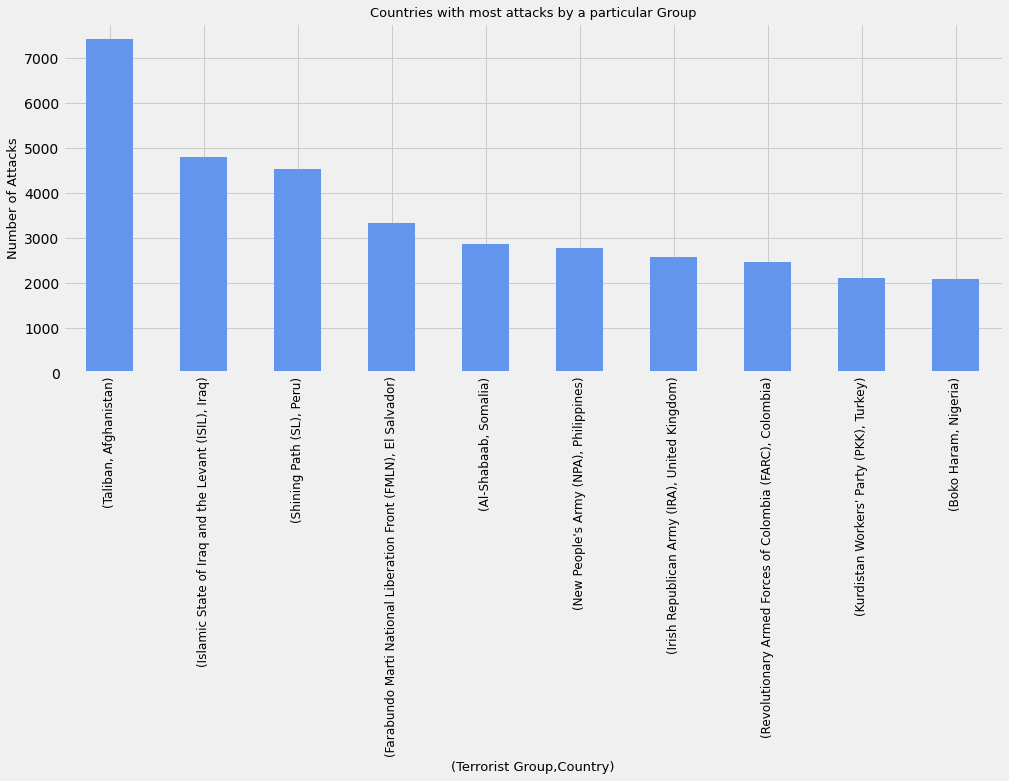

In [ ]:
group_country_wise.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

#Conclusions
####Taliban Mostly attacked afghanistan

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Attack Type', 'Target Type', 'Group Name', 'Weapon Type', 'Killed',
       'Wounded'],
      dtype='object')

#Analysis on People Killed & Wounded

In [ ]:
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
features = ['Region','Country','City','Attack Type','Target Type','Group Name']

Region VS Casualty Dataframe

                         Region  Casualty
5    Middle East & North Africa  351950.0
8                    South Asia  242679.0
10           Sub-Saharan Africa  131243.0
7                 South America   45553.0
9                Southeast Asia   41896.0
1   Central America & Caribbean   37699.0
6                 North America   26447.0
11               Western Europe   25026.0
4                Eastern Europe   19460.0
3                     East Asia   10365.0
2                  Central Asia    3009.0
0         Australasia & Oceania     410.0

Maximum Number of Casualty are 351950.0 and the Region is Middle East & North Africa
Minimum Number of Casualty are 410.0 and the Region is Australasia & Oceania



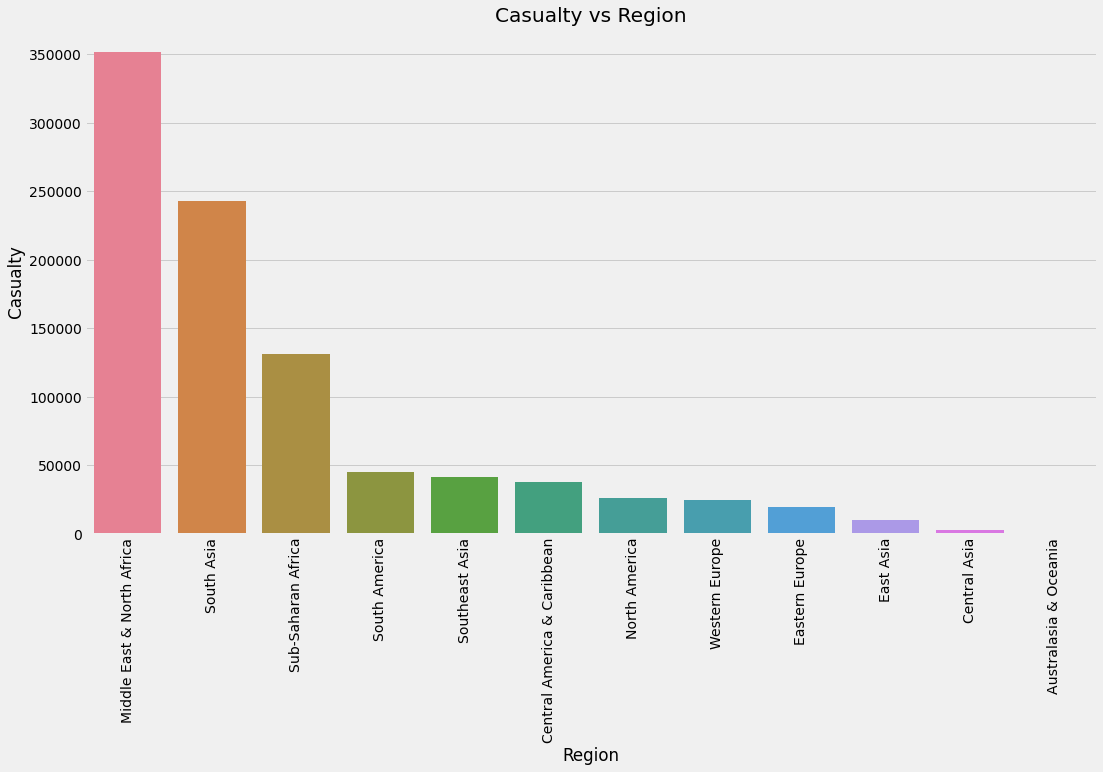

------------------------------------------------------------------------------------------------------------------------------------------------------




Country VS Casualty Dataframe

           Country  Casualty
84            Iraq  213279.0
0      Afghanistan   83661.0
134       Pakistan   65860.0
80           India   48321.0
130        Nigeria   32921.0
167      Sri Lanka   31091.0
175          Syria   29338.0
35        Colombia   25026.0
189  United States   24473.0
140    Philippines   22926.0
2          Algeria   20216.0
159        Somalia   19148.0
200          Yemen   18104.0
52     El Salvador   17115.0
139           Peru   16849.0
183         Turkey   16787.0
99         Lebanon   14965.0
128      Nicaragua   12329.0
147         Russia   11749.0
179       Thailand   10560.0

Maximum Number of Casualty are 213279.0 and the Country is Iraq
Minimum Number of Casualty are 10560.0 and the Country is Thailand



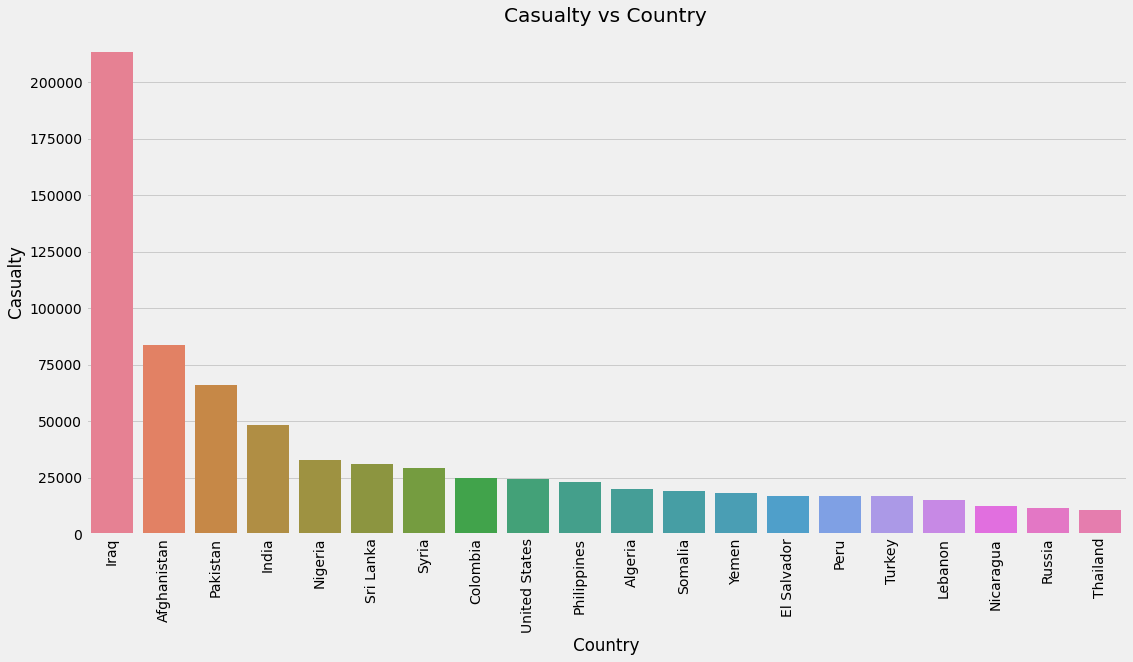

------------------------------------------------------------------------------------------------------------------------------------------------------




City VS Casualty Dataframe

                City  Casualty
3042         Baghdad   77876.0
34517        Unknown   36745.0
24144  New York City   19619.0
22828          Mosul   12927.0
16058        Karachi    9376.0
22519      Mogadishu    8868.0
15377          Kabul    8466.0
4417          Beirut    7257.0
17457         Kirkuk    6636.0
8037         Colombo    5906.0
1374          Aleppo    5748.0
27530         Quetta    5590.0
26275       Peshawar    5572.0
33742          Tokyo    5562.0
23596        Nairobi    5472.0
3866         Baqubah    5119.0
8556        Damascus    4528.0
27789         Ramadi    4499.0
33494         Tikrit    4453.0
18975         Lahore    4082.0

Maximum Number of Casualty are 77876.0 and the City is Baghdad
Minimum Number of Casualty are 4082.0 and the City is Lahore



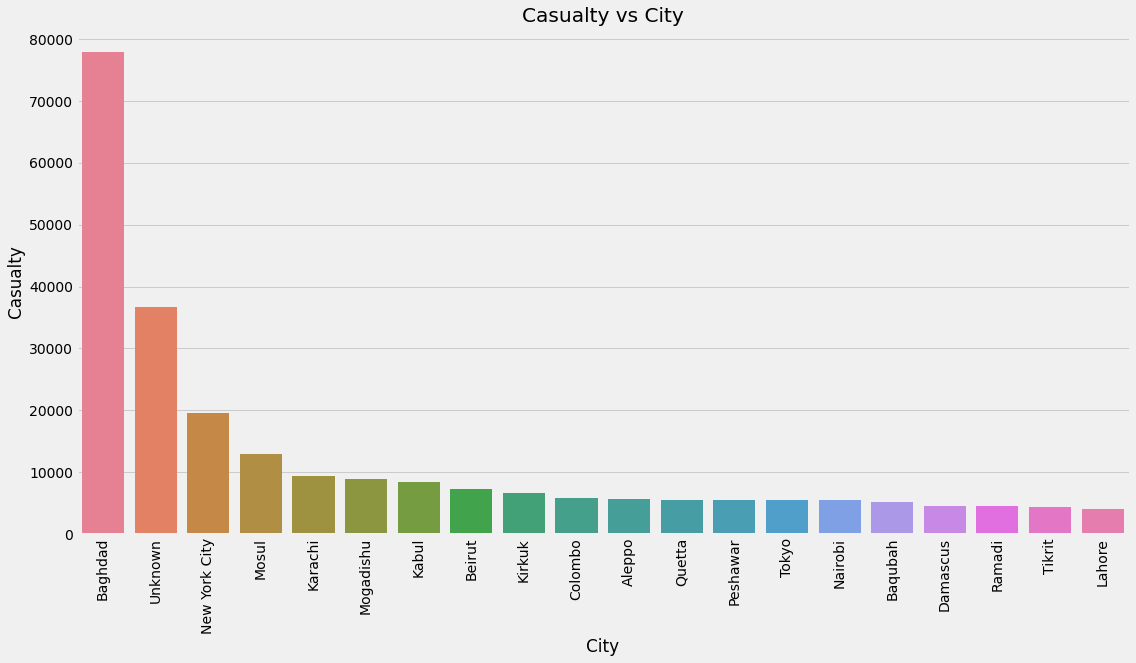

------------------------------------------------------------------------------------------------------------------------------------------------------




Attack Type VS Casualty Dataframe

                           Attack Type  Casualty
2                    Bombing/Explosion  577113.0
0                        Armed Assault  237663.0
1                        Assassination   38807.0
6          Hostage Taking (Kidnapping)   30677.0
4                            Hijacking   20719.0
7                      Unarmed Assault   14907.0
5  Hostage Taking (Barricade Incident)    8444.0
3       Facility/Infrastructure Attack    7407.0

Maximum Number of Casualty are 577113.0 and the Attack Type is Bombing/Explosion
Minimum Number of Casualty are 7407.0 and the Attack Type is Facility/Infrastructure Attack



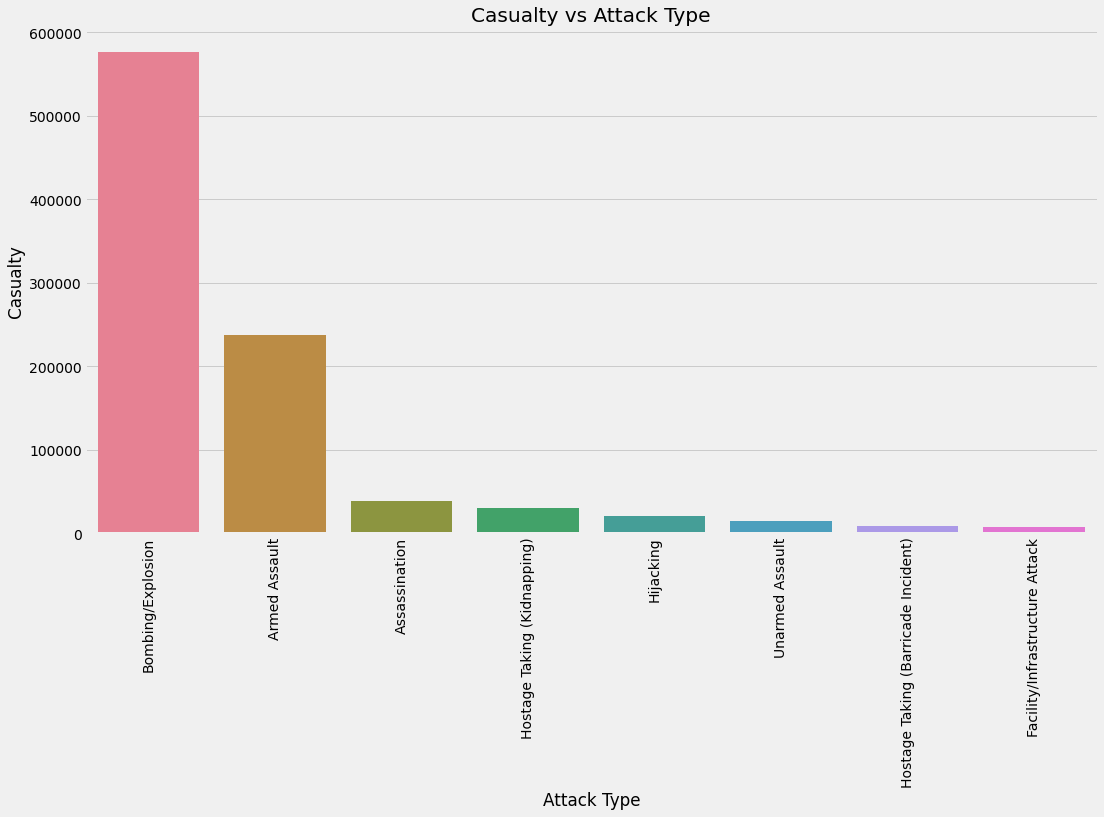

------------------------------------------------------------------------------------------------------------------------------------------------------




Target Type VS Casualty Dataframe

                       Target Type  Casualty
13     Private Citizens & Property  327064.0
9                         Military  177085.0
12                          Police  118407.0
2                         Business   78018.0
6             Government (General)   67255.0
18                  Transportation   54595.0
14  Religious Figures/Institutions   37890.0
16    Terrorists/Non-State Militia   17311.0
3          Educational Institution   13972.0
5          Government (Diplomatic)   13398.0
20         Violent Political Party    8920.0
1              Airports & Aircraft    7245.0
7              Journalists & Media    3297.0
19                       Utilities    3227.0
8                         Maritime    2099.0
17                        Tourists    2048.0
10                             NGO    1950.0


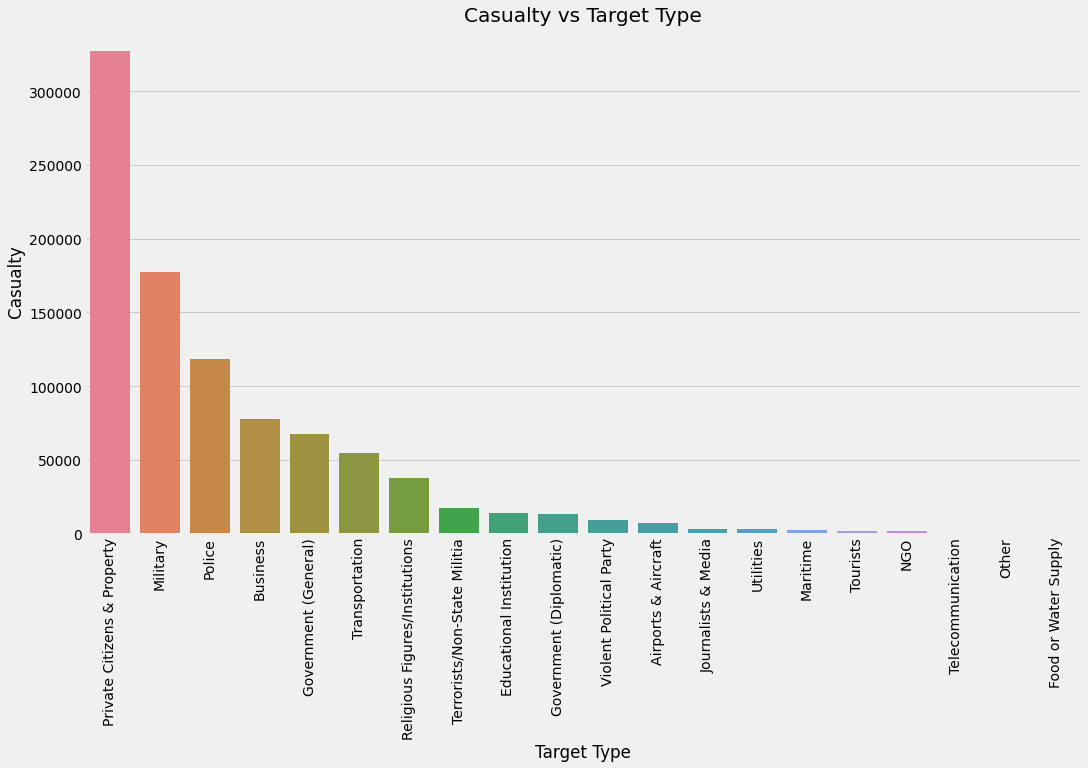

------------------------------------------------------------------------------------------------------------------------------------------------------




Group Name VS Casualty Dataframe

                                            Group Name  Casualty
3408                                           Unknown  322706.0
1535       Islamic State of Iraq and the Levant (ISIL)   69595.0
3138                                           Taliban   57342.0
704                                         Boko Haram   29801.0
161                                           Al-Qaida   28372.0
1864           Liberation Tigers of Tamil Eelam (LTTE)   22020.0
177                                         Al-Shabaab   16954.0
3165                   Tehrik-i-Taliban Pakistan (TTP)   15574.0
165                                   Al-Qaida in Iraq   14724.0
2948                                 Shining Path (SL)   14632.0
1120  Farabundo Marti National Liberation Front (FMLN)   12130.0
2717     Revolutionary Armed Fo

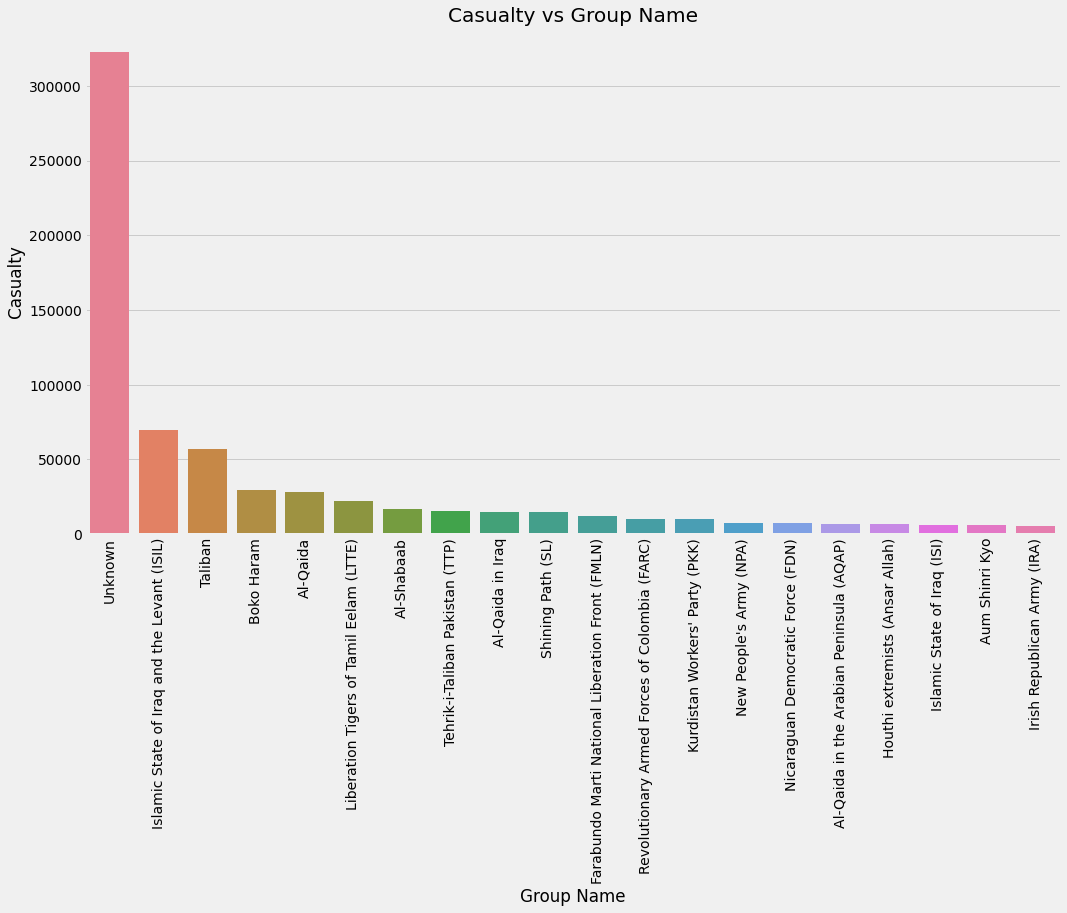

------------------------------------------------------------------------------------------------------------------------------------------------------






In [ ]:
for elem in features:
  data = df.groupby(elem)['Casualty'].sum().reset_index().sort_values(by ='Casualty',ascending = False)
  data_first_20 = data.head(20)
  print(f'{elem} VS Casualty Dataframe')
  print('')
  print(data_first_20)
  print('')
  max_casualty = data_first_20['Casualty'].max()
  min_casualty = data_first_20['Casualty'].min()
  max_id = data_first_20['Casualty'].idxmax()
  min_id = data_first_20['Casualty'].idxmin()
  max_elem = data_first_20[elem][max_id]
  min_elem = data_first_20[elem][min_id]
  print(f'Maximum Number of Casualty are {max_casualty} and the {elem} is {max_elem}')
  print(f'Minimum Number of Casualty are {min_casualty} and the {elem} is {min_elem}')
  print('')
  
 
  sns.catplot(data = data_first_20,x = elem,y = 'Casualty',kind = 'bar',height = 8,aspect = 2,palette = "husl")
  plt.xticks(rotation = 90)
  plt.title(f'Casualty vs {elem}')
  plt.show()
  print("-"*150)
  print("\n" * 3)

In [ ]:
# Year wise analysis
by_year_casualty = df.groupby('Year')['Casualty'].sum().reset_index()

In [ ]:
by_year_casualty.head()

,Year,Casualty
0,1970,386.0
1,1971,255.0
2,1972,975.0
3,1973,865.0
4,1974,1404.0


In [ ]:
#All the Casualty happend till date
by_year_casualty['Casualty'].sum()

935737.0

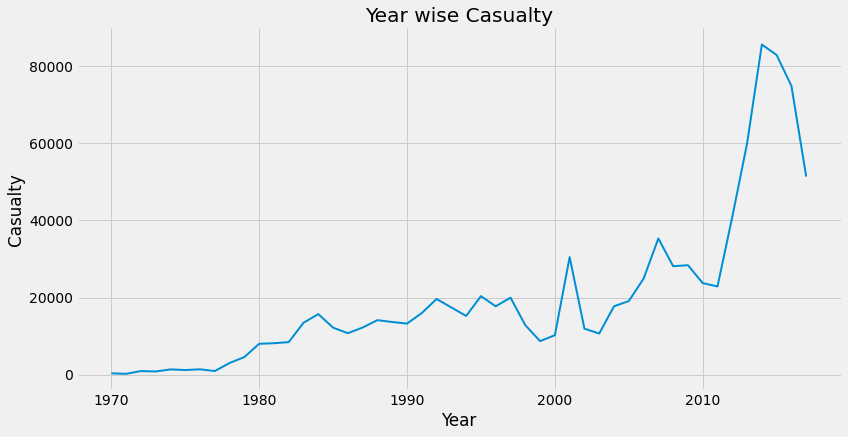

In [ ]:
#Visulisation
sns.relplot(data =by_year_casualty,x = 'Year',y = 'Casualty',kind = 'line',height = 6,aspect = 2,lw = 2)
plt.title('Year wise Casualty')
plt.show()

1. Year wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 16903 in 2014 <br>
 &ensp; &ensp; (b) Least number of attacks: 471 in 1971 <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 85618 in 2014 <br>
 &ensp; &ensp; (b) Least number of casualties: 255 in 1971 <br>

2. Region wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 50474 in "Middle East & North Africa"  <br>
 &ensp; &ensp; (b) Least number of attacks: 282 in "Australia & Oceania"   <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 351950 in "Middle East & North Africa" <br>
 &ensp; &ensp; (b) Least number of casualties: 410 in Australia & Oceania <br>

3. Country wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 24636 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of attacks: 4292 in "Turkey" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 213279 in "Iraq" <br>
 &ensp; &ensp; (b) Least number of casualties: 22926 in "Philippines" <br>

4. City wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 7589 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of attacks: 1019 in "Athens" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 77876 in "Baghdad" <br>
 &ensp; &ensp; (b) Least number of casualties: 5748 in "Aleppo" <br>
<br>
5. Terrorist Group wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 7478 by "Taliban" <br>
 &ensp; &ensp; (b) Least number of attacks : 2418 by "Boko Haram" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)" <br>
 &ensp; &ensp; (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)" <br>

6. Attack Type wise Attacks: <br> 
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 88255 by "Bombing/Explosion" <br>
 &ensp; &ensp; (b) Least number of attacks : 659 by "Hijacking" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 530007 by "Bombing/Explosion" <br>
 &ensp; &ensp; (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack" <br>

7. Target Type wise Attacks: <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 43511 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of attacks : 263 over "Abortion Related" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 319176 over "Private Citizens & Property" <br>
 &ensp; &ensp; (b) Least number of casualties : 56 over "Abortion Related" <br>

8. Group and Country wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan" <br>
 &ensp; &ensp; (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan" <br>
 &ensp; &ensp; (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)"	in "El Salvador" <br>

9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 : <br>
&nbsp; (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737 <br>
